# Unemployment Rate Analysis Using Python: Trends, COVID-19 Impact & Policy Insights

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Loading the dataset

In [4]:
df = pd.read_csv('C:/AI lab/Unemployment in India.csv') 


In [6]:
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban


In [8]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 41.4+ KB


In [14]:
df.columns = df.columns.str.strip()

In [16]:
df.columns.tolist()

['Region',
 'Date',
 'Frequency',
 'Estimated Unemployment Rate (%)',
 'Estimated Employed',
 'Estimated Labour Participation Rate (%)',
 'Area']

In [18]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

In [20]:
if 'Month' in df.columns:
    df['Month'] = pd.to_datetime(df['Month'])
else:
    print("Column 'Month' not found. Available columns:", df.columns.tolist())

Column 'Month' not found. Available columns: ['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)', 'Area']


In [22]:
df = df.dropna(subset=['Estimated Unemployment Rate (%)'])

In [26]:
df = df.rename(columns={'date': 'Date'})

In [30]:
# Check and clean column names
print(df.columns)
df.columns = df.columns.str.strip()

# Convert to datetime if 'Date' exists
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
else:
    print("Column 'Date' not found. Available columns:", df.columns)

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


In [32]:
# Summary statistics
print(df['Estimated Unemployment Rate (%)'].describe())

count    740.000000
mean      11.787946
std       10.721298
min        0.000000
25%        4.657500
50%        8.350000
75%       15.887500
max       76.740000
Name: Estimated Unemployment Rate (%), dtype: float64


In [34]:
# Time range
print(f"Data covers from {df['Date'].min()} to {df['Date'].max()}")

Data covers from 2019-05-31 00:00:00 to 2020-06-30 00:00:00


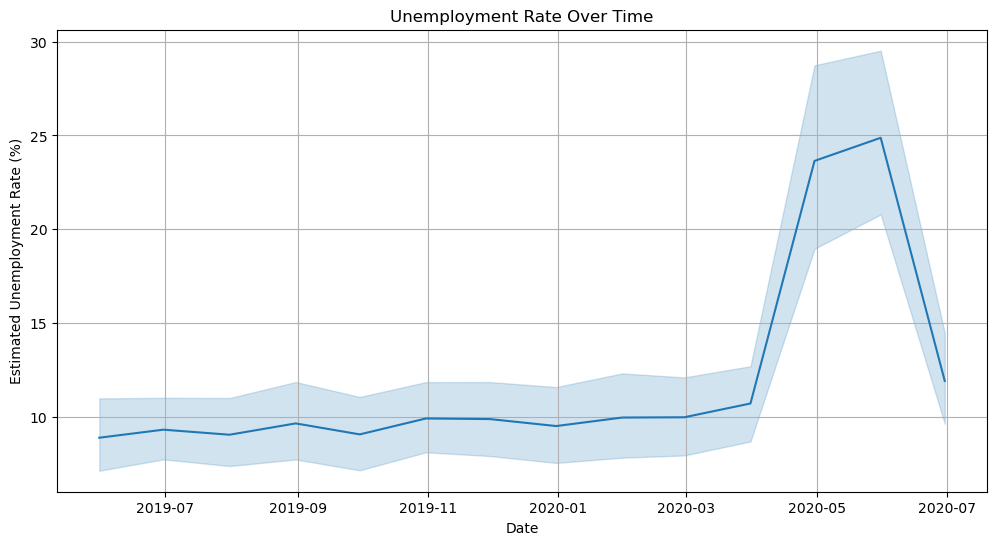

In [36]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Estimated Unemployment Rate (%)')
plt.title('Unemployment Rate Over Time')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.xlabel('Date')
plt.grid(True)
plt.show()

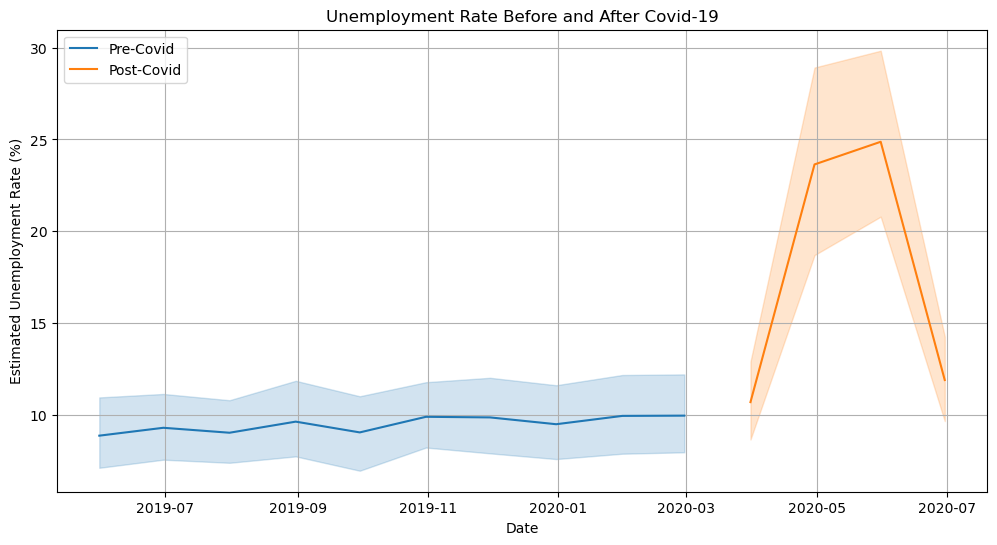

In [37]:
# Define Covid period (e.g., March 2020 onward)
covid_start = pd.to_datetime('2020-03-01')
df['Covid Period'] = df['Date'] >= covid_start

# Compare pre- and post-Covid unemployment
pre_covid = df[df['Covid Period'] == False]
post_covid = df[df['Covid Period'] == True]

plt.figure(figsize=(12, 6))
sns.lineplot(data=pre_covid, x='Date', y='Estimated Unemployment Rate (%)', label='Pre-Covid')
sns.lineplot(data=post_covid, x='Date', y='Estimated Unemployment Rate (%)', label='Post-Covid')
plt.title('Unemployment Rate Before and After Covid-19')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.show()

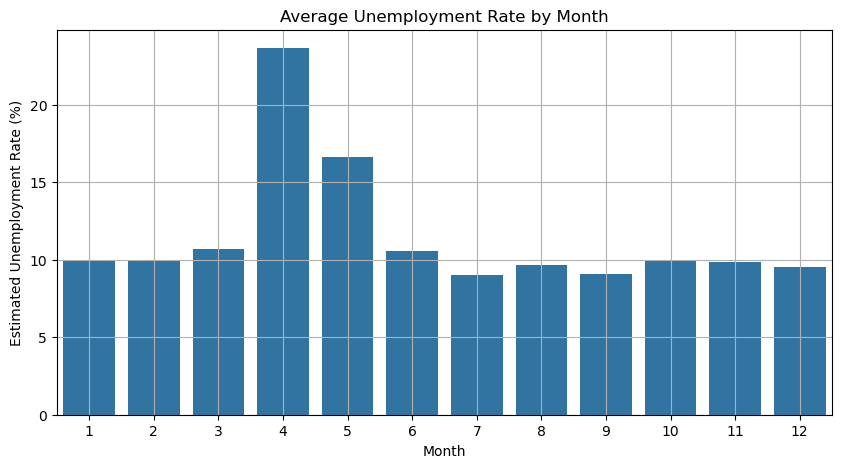

In [39]:
# Extract month and year
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Monthly average unemployment
monthly_avg = df.groupby('Month')['Estimated Unemployment Rate (%)'].mean()

plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_avg.index, y=monthly_avg.values)
plt.title('Average Unemployment Rate by Month')
plt.xlabel('Month')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.grid(True)
plt.show()

# Time Series Plot

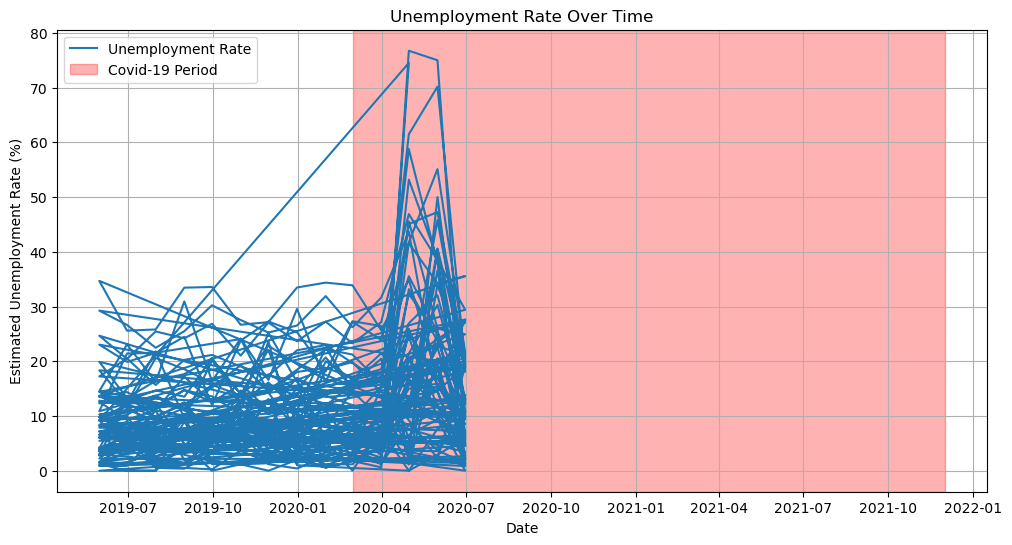

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Estimated Unemployment Rate (%)'], label='Unemployment Rate')
plt.axvspan(pd.to_datetime('2020-03'), pd.to_datetime('2021-12'), color='red', alpha=0.3, label='Covid-19 Period')
plt.title('Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.legend()
plt.grid(True)
plt.show()

# Covid-19 Impact Analysis
# Compare Pre- and Post-Covid Periods


In [46]:
pre_covid = df[df['Date'] < '2020-03']
post_covid = df[df['Date'] >= '2020-03']

print("Pre-Covid Avg Unemployment:", pre_covid['Estimated Unemployment Rate (%)'].mean())
print("Post-Covid Avg Unemployment:", post_covid['Estimated Unemployment Rate (%)'].mean())

Pre-Covid Avg Unemployment: 9.509533582089553
Post-Covid Avg Unemployment: 17.774362745098042


#  Monthly Trends

#  Seasonal & Pattern Analysis
# Decomposition


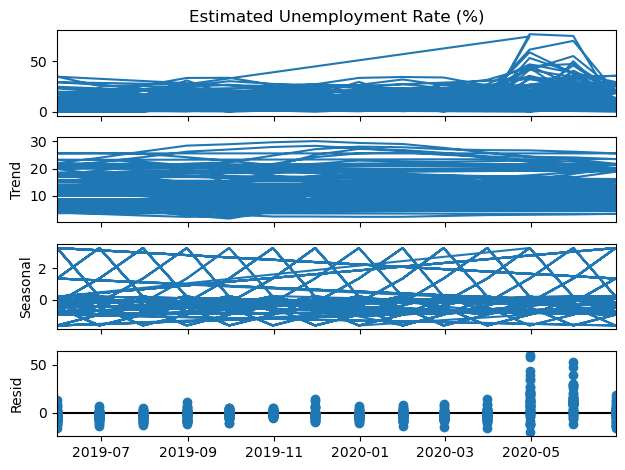

In [50]:
from statsmodels.tsa.seasonal import seasonal_decompose

df.set_index('Date', inplace=True)
result = seasonal_decompose(df['Estimated Unemployment Rate (%)'], model='additive', period=12)
result.plot()
plt.show()